# MODEL SIMULASI UNTUK OPTIMASI PENENTUAN WAKTU MEMASAK BUAH KELAPA SAWIT DENGAN LOGIKA FUZZY MAMDANI

NAMA :NUZULA RAHMA SAFITRI

NIM :09011281722083

KELAS :SK5A

Model simulasi untuk optimasi penentuan waktu memasak buah kelapa sawit dengan logika fuzzy. Telah
dibangun suatu model simulasi untuk mengoptimasi waktu memasak buah kelapa sawit pada suatu proses
perebusan. Metode yang digunakan untuk membangun model simulasi dalam optimasi ini adalah logika
fuzzy. Dalam penelitian ini sebagai variabel bebasnya adalah jumlah buah kelapa sawit dan tekanan uap air
dalam sterillizer, sedangkan sebagai variabel tak bebasnya atau nilai yang dicari adalah waktu memasak
buah kelapa sawit. Variabel bebas jumlah buah kelapa sawit diasumsikan dengan fungsi keanggotaan
Sedikit, Standard dan Banyak sedangkan variabel bebas tekanan uap air dalam sterillizer diasumsikan
dengan fungsi keanggotaan Kecil, Normal dan Besar. Untuk variabel tak bebas waktu memasak diasumsikan
fungsi keanggotaan adalah Singkat, Normal dan Lama. Aturan fuzzy yang digunakan ada 9 aturan.
Defuzzyfikasinya menggunakan metode Mamdani. Untuk menyelesaikan persoalan tersebut, digunakan
perangkat lunak MATLAB. Hasil penelitian menunjukkan bahwa untuk optimasi waktu memasak buah kelapa
sawit dapat menggunakan logika fuzzy. Dalam penelitian ini yang dibahas baru pada proses perebusannya
saja dan akan dikembangkan untuk pemrograman fuzzy yang ditanam di dalam mikrokontroller.Variable yang digunakan berjumlah 3 variabel yaitu 2 variabel input dan 1 variabel output. Dari 3 variabel tersebut terdiri 3 himpunan fuzzy yaitu sedikit, setandar, dan banyak.

Maka, dari latar belakang tersebut setiap keadaan dari varibel input dan output akan dijabarkan dalam linguistik sebagai berikut:
## Input
### - banyak buah
   Kategori himpunan fuzzy:
   - **Sedikit  :** 10
   - **Standar :** 15
   - **Banyak :** ≥ 20
 
### - tekanan uap
   Kategori himpunan fuzzy:
   - **kecil :** 3
   - **normal :** 5
   - **Besar :** ≥ 5
 
## Output
### - waktu masak
   Kategori himpunan fuzzy:
   - **Sedikit :** 20
   - **Sedang :** 40
   - **Banyak :** ≥ 40

### Mengimpor library untuk fuzzy
Library yang akan digunakan adalah numpy, skfuzzy, dan matplotlib.pyplot. Selain itu kita juga menggunakan fungsi control dari library skfuzzy.

#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np #import numpy gunkan np untuk menggunakan library ini
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctrl #panggi library control dari skfuzzy gunakan ctrl untuk menggunakan library ini

### Mengimpor library untuk fuzzy
Library yang akan digunakan adalah numpy, skfuzzy, dan matplotlib.pyplot. Selain itu kita juga menggunakan fungsi control dari library skfuzzy.

In [7]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np #import numpy gunkan np untuk menggunakan library ini
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctrl #panggi library control dari skfuzzy gunakan ctrl untuk menggunakan library ini

# Fuzzyfikasi
### Menentukan variabel dan semesta pembicaraan
Pada langkah ini, setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).

In [8]:
#membuat 3 variabel fuzzy, 2 sebagai input dan 1 output
bb = ctrl.Antecedent(np.arange(0,26,1),'banyak buah') #variabel banyak buah dg nilai 0 - 26 dengan range 1
tu = ctrl.Antecedent(np.arange(0,7,1),'tekanan uap') #varibel tekanan uap dg nilai 0 - 7 dengan range 1
wm = ctrl.Consequent(np.arange(0,42,1),'waktu masak') #variabel waktu masak dg nilai 0 - 42 dengan range 1

`Antecedent` adalah premis atau sebagai input, dan `consequent` adalah kesimpulan atau sebagai output. Dan angka-angka yang terdapat di dalam kurung merupakan batas-batas yang formatnya _**(batas awal, batas akhir, kelipatan)**_, selanjutnya batas tersebut diberi label dengan nama variabelnya.

### Menentukan Himpunan Fuzzy
Setelah menentukan semesta pembicaraan atau crisp dari masing-masing variabel dalam bentuk numerik, maka selanjutnya kita akan membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal.

### Menentukan Fungsi Keanggotaan
Menentukan fungsi keanggotaan artinya mendefinisikan himpunan fuzzy dengan memetakan masukan crisp dari domainnya, ke derajat keanggotaan. 
Pada fuzzy terdapat beberapa fungsi keanggotaan yang bisa direpresentasikan dalam beberapa format, dua diantaranya adalah kurva segitiga dan trapesium. 

Karena kita akan menggunakan kurva segitiga dan trapesium, maka fungsi yang akan digunakan adalah `fuzz.trimf` untuk kurva segitiga, dan `fuzz.trapmf` untuk kurva trapesium. Lalu untuk mendefinisikan masing-masing domainnya, digunakan `variabel.universe`. Selanjutnya terdapat batas-batas(domain) yang formatnya adalah `[batas awal, titik puncak, batas akhir]` untuk kurva segitiga, `[batas awal, titik puncak, titik puncak, batas akhir]` untuk kurva trapesium.
Jadi perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])` untuk kurva segitiga, dan `variabel['nama himpunan fuzzy'] = fuzz.trapmf(variabel.universe, [batas awal, titik puncak, titik puncak, batas akhir])` untuk kurva trapesium.

### Fungsi Keanggotaan Variabel Banyak Buah

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


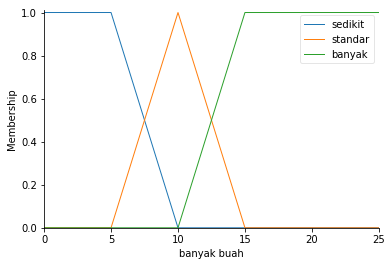

In [9]:
#membuat membership function untuk variabel banyak buah
bb['sedikit'] = fuzz.trapmf(bb.universe,(0,0,5,10)) #membership function sedikit, dalam bentuk trapesium dengan nilai 0 - 10
bb['standar'] = fuzz.trimf(bb.universe,(5,10,15)) #membership function standar, dg bentuk segitiga dg nilai 5 - 15
bb['banyak'] = fuzz.trapmf(bb.universe,(10,15,25,25)) #membership function banyak, dg bentuk trapesium dg nilai 10 - 25
bb.view() #mencetak membership function banyak buah dalam satu grafik

$bb [sedikit] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 0 \\
       {10-x \over 10} & \mbox{; } 0 < x < 10 \\
       0 & \mbox{; } x \geq 10
    \end{array}
\right.$

$bb [setandar] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 5 \\
       {x-5 \over 5} & \mbox{; } 5 < x ≤ 10 \\
       {15-x \over 5} & \mbox{; } 10 < x < 15 \\
    \end{array}
\right.$
    
$bb [banyak] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 10 \\
       {x-10 \over 10} & \mbox{; } 10 < x < 20 \\
       1 & \mbox{; } x \geq 20
    \end{array}
\right.$


### Fungsi Keanggotaan Variabel Tekanan Uap

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


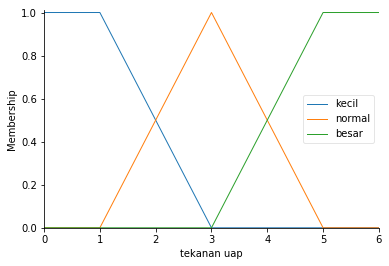

In [10]:
#membuat membership function untuk variabel tekanan uap
tu['kecil'] = fuzz.trapmf(tu.universe,[0,0,1,3]) #membership function sedikit, dalam bentuk trapesium dengan nilai 0 - 3
tu['normal'] = fuzz.trimf(tu.universe,[1,3,5]) #membership function normal, dg bentuk segitiga dg nilai 1 - 5
tu['besar'] = fuzz.trapmf(tu.universe,[3,5,6,6]) #membership function banyak, dg bentuk trapesium dg nilai 3 - 6
tu.view() #mencetak membership function tekanan uap dalam satu grafik

$tu [kecil] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x ≤ 1 \\
       {3-x \over 2} & \mbox{; } 1 < x < 3 \\
       0 & \mbox{; } x \geq 3
    \end{array}
\right.$

$tu [normal] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 1 \\
       {x-1 \over 2} & \mbox{; } 1 < x ≤ 3 \\
       {5-x \over 2} & \mbox{; } 3 < x < 5 \\
    \end{array}
\right.$
    
$tu [besar] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 3 \\
       {x-3 \over 2} & \mbox{; } 3 < x < 5 \\
       1 & \mbox{; } x \geq 5
    \end{array}
\right.$


### Fungsi Keanggotaan Variabel Waktu Memasak

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


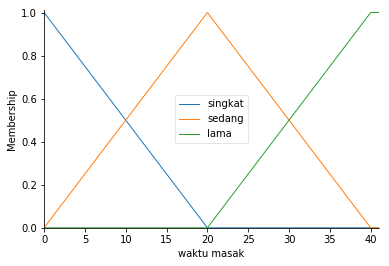

In [12]:
#membuat membership function untuk variabel waktu masak
wm['singkat'] = fuzz.trapmf(wm.universe,(0,0,0,20)) #membership function singkat, dalam bentuk trapesium dengan nilai 0 - 20
wm['sedang'] = fuzz.trimf(wm.universe,(0,20,40)) #membership function sedang, dalam bentuk segitiga dengan nilai 0 - 40
wm['lama'] = fuzz.trapmf(wm.universe,(20,40,41,41)) #membership function lama, dalam bentuk trapesium dengan nilai 20 - 40
wm.view() #mencetak membership function waktu masak dalam satu grafik

$tu [singkat] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 0 \\
       {20-x \over 2} & \mbox{; } 0 < x < 20 \\
       0 & \mbox{; } x \geq 20
    \end{array}
\right.$

$tu [sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 0 \\
       {x-0 \over 2} & \mbox{; } 0 < x ≤ 20 \\
       {40-x \over 2} & \mbox{; } 20 < x < 40 \\
    \end{array}
\right.$
    
$tu [lama] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 20 \\
       {x-20 \over 2} & \mbox{; } 20 < x < 40 \\
       0 & \mbox{; } x \geq 40
    \end{array}
\right.$


### Penentuan rule base

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x716bd50>)

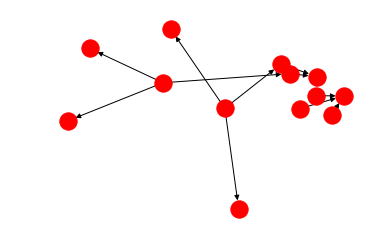

In [13]:
#membuat aturan untuk menentukan  
#karena input ada 2 dan setiap input mempunyai dua kondisi maka saya membuat 9 aturan atau 3*3
rule1 = ctrl.Rule(bb['sedikit'] & tu['besar'], wm['singkat'])
rule2 = ctrl.Rule(bb['sedikit'] & tu['normal'], wm['singkat'])
rule3 = ctrl.Rule(bb['sedikit'] & tu['kecil'], wm['sedang'])
rule4 = ctrl.Rule(bb['standar'] & tu['besar'], wm['singkat'])
rule5 = ctrl.Rule(bb['standar'] & tu['normal'], wm['sedang'])
rule6 = ctrl.Rule(bb['standar'] & tu['kecil'], wm['lama'])
rule7 = ctrl.Rule(bb['banyak'] & tu['besar'], wm['sedang'])
rule8 = ctrl.Rule(bb['banyak'] & tu['normal'], wm['lama'])
rule9 = ctrl.Rule(bb['banyak'] & tu['kecil'], wm['lama'])

rule1.view() #mencetak gambar aturan

| No | banyak buah| tekanan uap | waktu memasak | 
|----|------------|-------------|---------------|
| 1  |   sedikit  |   besar     |    singkat    |   
| 2  |   sedikit  |   normal    |    sedang     |   
| 3  |   sedikit  |   kecil     |    sedang     |  
| 4  |   standar  |   besar     |    singkat    |   
| 5  |   standar  |   normal    |    sedang     |   
| 6  |   standar  |   kecil     |     lama      |   
| 7  |   banyak   |   besar     |    Sedang     |  
| 8  |   banyak   |   normal    |     lama      |   
| 9  |   banyak   |   kecil     |     lama      |  


<center>__Tabel 1.1 Rule yang Digunakan__

### Menggabungkan semua rule untuk dijadikan sebagai control system

In [15]:
simulasiwaktu_rule1 = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### Menggunakan mode simulasi

In [16]:
waktumasak_rule = ctrl.ControlSystemSimulation(simulasiwaktu_rule1)

### Simulasi dengan memasukan nilai pada variabel input

In [17]:
#membuat interupsi yang meminta inputan dari keyboard
bb = input('banyak buah :') #membuat inputan untuk nilai banyak buah           
tu = input('tekanan uap: ') #membuat inputan untuk nilai tekanan uap

banyak buah :20
tekanan uap: 5


In [18]:
waktumasak_rule.input['banyak buah'] = float(bb) #merubah format data nilaibanyakbuah menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
waktumasak_rule.input['tekanan uap'] = float(tu) #merubah format data tekananuap menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat

waktumasak_rule.compute() #menghitung waktu

### Menampilkan grafik hasil Inferensi dan Defuzzyfikasi


20.000000000000004


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


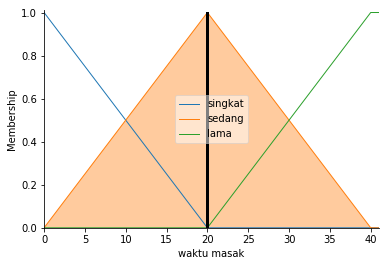

In [19]:
print(waktumasak_rule.output['waktu masak'])
wm.view(sim=waktumasak_rule)

# Perhitungan Manual

waktu masak

 $$ waktu masak = \frac{(13.33 \times 5) + (26.66 \times 5) + (23.33 \times 5) + (26.66 \times 5)}{5+5+5+5} $$
 
 $$ waktu masak = \frac{66.65 + 133.3 + 116.65 + 133.3}{20} $$
 
 $$ waktu masak = \frac{449.9}{20} $$
 
 $$ waktu masak = 22.495 \,  $$